In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

import os

import andes

import scienceplots

import imageio
from tqdm import tqdm

In [2]:
plt.style.use(['science','ieee'])

In [3]:
andes.__version__

'1.8.7.post5+gb9281204'

In [4]:
%matplotlib inline

In [5]:
cwd = os.getcwd()

In [6]:
ss = andes.load(os.path.join(cwd, '../data/case/ieee39_vis.xlsx'))

In [7]:
vis1_path = os.path.join(cwd, '../data/output/ieee39_vis1_out_short.csv')
vis4_path = os.path.join(cwd, '../data/output/ieee39_vis4_out_short.csv')

vis1 = pd.read_csv(vis1_path)
vis4 = pd.read_csv(vis4_path)

In [8]:
cols = [string for string in vis1.columns if "Wf_y" in string]
cols = ['Time [s]'] + cols

vis1c = vis1.copy()
vis4c = vis4.copy()

vis1c[cols[1:]] = vis1c[cols[1:]].apply(lambda x: x*ss.config.freq)
vis4c[cols[1:]] = vis4c[cols[1:]].apply(lambda x: x*ss.config.freq)

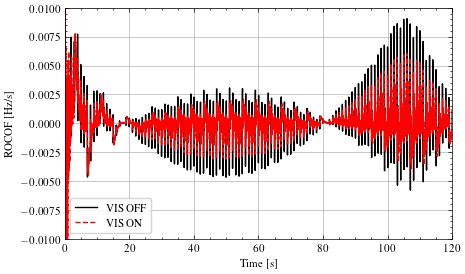

In [9]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)

col = cols[7]

vis1c.plot(x='Time [s]', y=col,
           label='VIS OFF',
           ax=ax, fig=fig,
           )

vis4c.plot(x='Time [s]', y=col,
           label='VIS ON',
           ax=ax, fig=fig,
           )

ax.set_xlim([0, 120])
ax.set_ylim([-0.01, 0.01])
ax.set_ylabel('ROCOF [Hz/s]')
ax.grid()
ax.legend(loc='lower left', frameon=True)

plt.show()


In [10]:
# assuming your dataframe is called df
img_path = os.path.join(cwd, '../data/img/vis')

col = cols[7]

def create_frame(t):
    fig_a, ax_a = plt.subplots(figsize=(5, 3), dpi=100)
    plt.tight_layout()
    ax_a.cla()

    ax_a.plot(vis1c['Time [s]'].iloc[0:t], vis1c[col].iloc[0:t],
              label='VIS OFF')

    ax_a.plot(vis4c['Time [s]'].iloc[0:t], vis4c[col].iloc[0:t],
              label='VIS ON')

    ax_a.set_xlim([0, 120])
    ax_a.set_ylim([-0.01, 0.01])
    ax_a.set_ylabel('ROCOF [Hz/s]')
    ax_a.set_xlabel('Time [s]')
    ax_a.grid()

    ax_a.legend(loc='lower left', frameon=True)

    fig_a.savefig(f'./img/img_{t}.png',
                  transparent=False,
                  facecolor='white',
                  bbox_inches='tight',
                  )
    ax_a.legend(loc='upper right')
    plt.close()


In [11]:
lenv = vis1c.shape[0]

In [ ]:
for t in tqdm(range(0, 1000)):
    create_frame(t)

In [ ]:
for t in tqdm(range(1000, 2000)):
    create_frame(t)

In [ ]:
for t in tqdm(range(2000, 3000)):
    create_frame(t)

In [ ]:
for t in tqdm(range(3000, lenv)):
    create_frame(t)

In [12]:
frames = []
for t in tqdm(range(lenv)):
    image = imageio.v2.imread(f'{img_path}/img_{t}.png')
    frames.append(image)

100%|██████████| 3704/3704 [00:10<00:00, 342.70it/s]


In [13]:
imageio.mimsave(f'{img_path}/evsfr.gif',
                frames,          # array of input frames
                fps=int(vis1c.shape[0] / 120),  # optional: frames per second
                )
